In [2]:
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

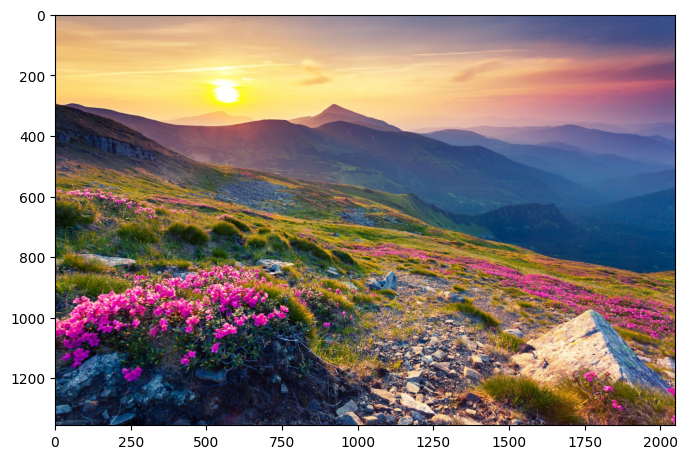

In [7]:
img = cv2.imread('mountains.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [18]:
# 1. White patch balance
white_x = 1312
white_y = 1229

kr, kg, kb = 255/img[white_x, white_y]
print('Supposed white pixel:', img[white_x, white_y])
print('Coefficients:', kr, kg, kb)

Supposed white pixel: [255 247 241]
Coefficients: 1.0 1.0323886639676114 1.058091286307054


[194 163 143] [194 168 151]
[255 247 241] [255 255 255]


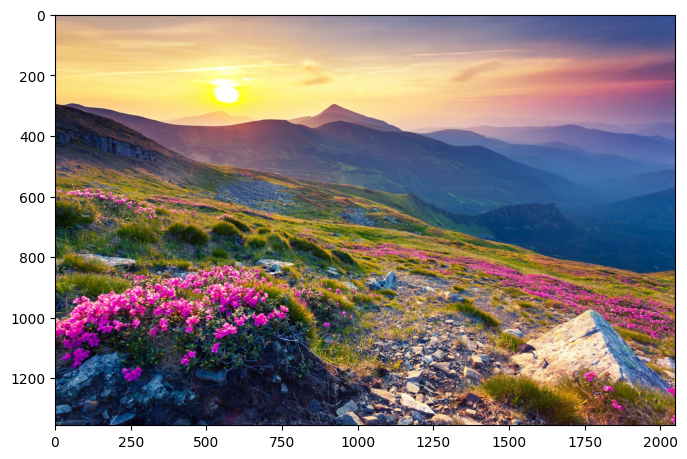

In [38]:
import numpy as np
img_white_bal = (img * (kr, kg, kb)).astype(int)
img_white_bal = np.minimum(img_white_bal, 255)
# img_white_bal[img_white_bal > 255] = 255

print(img[0, 0], img_white_bal[0, 0])
print(img[white_x, white_y], img_white_bal[white_x, white_y])
plt.imshow(img_white_bal)

Means: [125.90753515913072, 109.56539763954186, 102.89966036366151]
Average value: 112.79086438744469
Coefficients: 0.8958229882341174 1.0294387353798893 1.0961247489916517


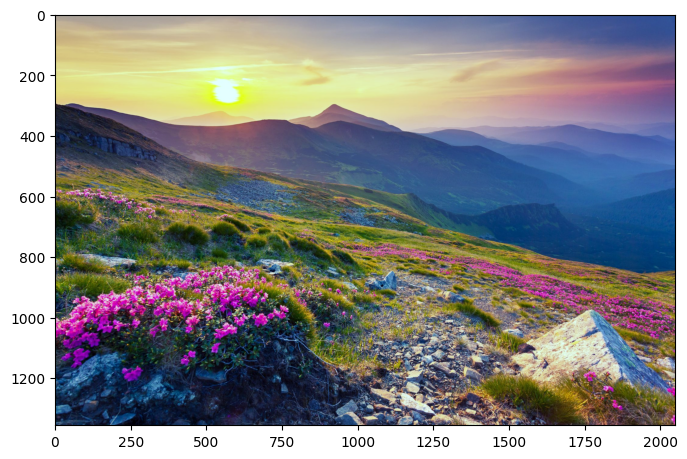

In [69]:
# 2. all gray balance
channel_means = [np.mean(img[..., i]) for i in range(3)]
avg_val = np.mean(channel_means)
print('Means:', channel_means)
print('Average value:', avg_val)

kr, kg, kb = avg_val / channel_means
print('Coefficients:', kr, kg, kb)

img_gray_bal = (img * (kr, kg, kb)).clip(max=255).astype(np.uint8)
# img_gray_bal = img_gray_bal.clip(max=255) # must be done before converting to uint8

plt.imshow(img_gray_bal)

Maximums: [255, 255, 255]
Maxs of dark image: [139, 139, 139]
Coefficients: 2.158273381294964 2.158273381294964 2.158273381294964
300.0
254
296
193
[300. 300. 300.]
[44 44 44]


(<Axes: >, <matplotlib.image.AxesImage at 0x244adfdf8b0>)

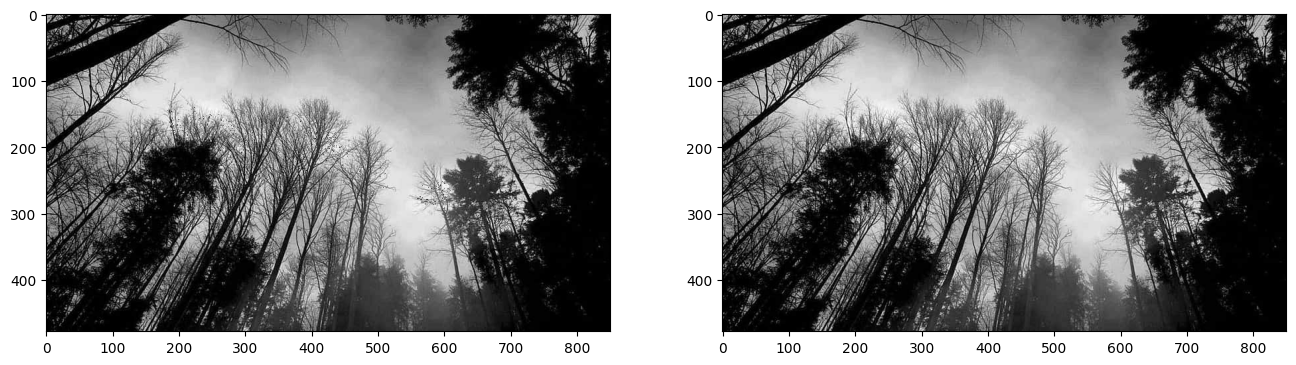

In [131]:
# 3. max balance

maxs = [np.max(img[..., i]) for i in range(3)]
print('Maximums:', maxs)

dark_img = cv2.imread('trees.jpg')
maxs = [np.max(dark_img[..., i]) for i in range(3)]
print('Maxs of dark image:', maxs)

kr, kg, kb = 300 / np.array(maxs)
print('Coefficients:', kr, kg, kb)

img_max_bal_no_clip = (dark_img * (kr, kg, kb)).astype(np.uint8)
img_max_bal_clip = (dark_img * (kr, kg, kb)).clip(max=255).astype(np.uint8)
t = dark_img * (kr, kg, kb)
print(np.max(t))
print(np.max(img_max_bal_no_clip))

print(np.argmax(t) // t.shape[2] % t.shape[1])
print(np.argmax(t) // t.shape[2] // t.shape[1] % t.shape[0])
print(t[193, 296])
print(img_max_bal_no_clip[193, 296])


plt.figure(figsize=(16, 12))
plt.subplot(121), plt.imshow(img_max_bal_no_clip)
plt.subplot(122), plt.imshow(img_max_bal_clip)

Coefficients: 1.8345323741007193 1.8345323741007193 1.8345323741007193
255.0
255
296
193
[255. 255. 255.]
[255 255 255]


(<Axes: >, <matplotlib.image.AxesImage at 0x244af00ef10>)

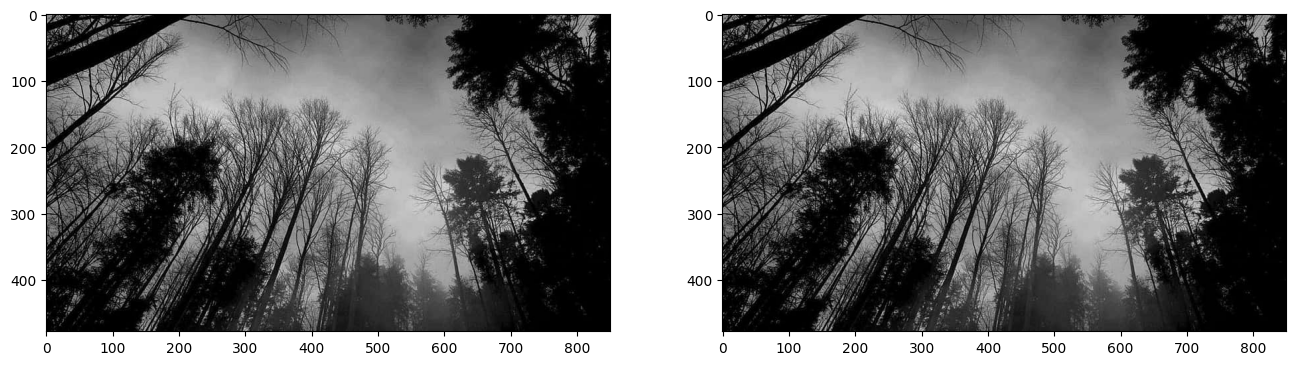

In [132]:
kr, kg, kb = 255 / np.array(maxs)
print('Coefficients:', kr, kg, kb)

img_max_bal_no_clip = (dark_img * (kr, kg, kb)).astype(np.uint8)
img_max_bal_clip = (dark_img * (kr, kg, kb)).clip(max=255).astype(np.uint8)
t = dark_img * (kr, kg, kb)
print(np.max(t))
print(np.max(img_max_bal_no_clip))

print(np.argmax(t) // t.shape[2] % t.shape[1])
print(np.argmax(t) // t.shape[2] // t.shape[1] % t.shape[0])
print(t[193, 296])
print(img_max_bal_no_clip[193, 296])


plt.figure(figsize=(16, 12))
plt.subplot(121), plt.imshow(img_max_bal_no_clip)
plt.subplot(122), plt.imshow(img_max_bal_clip)



(<Axes: >, <matplotlib.image.AxesImage at 0x244a8af2be0>)

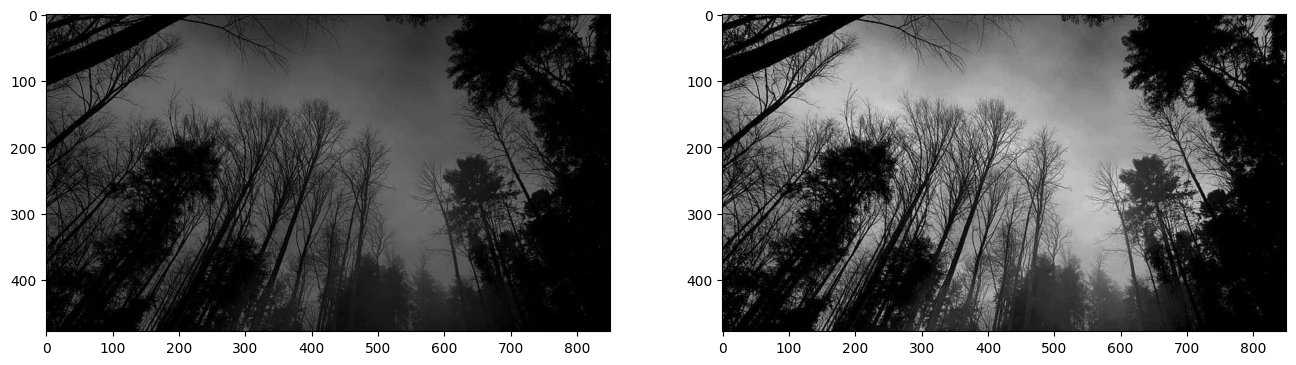

In [133]:
plt.figure(figsize=(16, 12))
plt.subplot(121), plt.imshow(dark_img)
plt.subplot(122), plt.imshow(img_max_bal_clip)
